## Business Case: **Aerofit**

About Aerofit:

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.



Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

## checking the structure & characteristics of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.keys()

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.shape

(180, 9)

## **Detecting Outliers**

<Axes: >

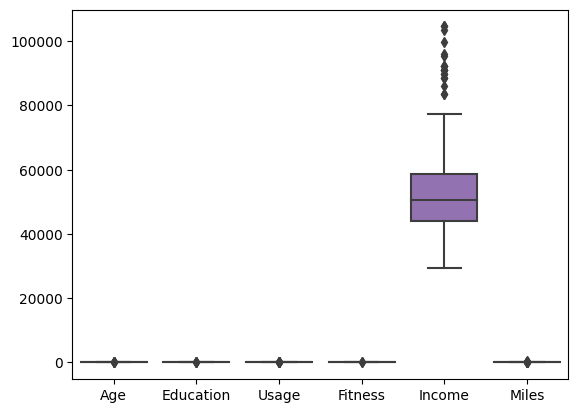

In [ ]:
sns.boxplot(data = df)

Income has outliers

In [ ]:
df.mean()

<ipython-input-14-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [ ]:
df.median()

<ipython-input-15-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

In [ ]:
df.mean() - df.median()

<ipython-input-16-2137b9332069>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean() - df.median()
<ipython-input-16-2137b9332069>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean() - df.median()


Age             2.788889
Education      -0.427778
Usage           0.455556
Fitness         0.311111
Income       3123.077778
Miles           9.194444
dtype: float64

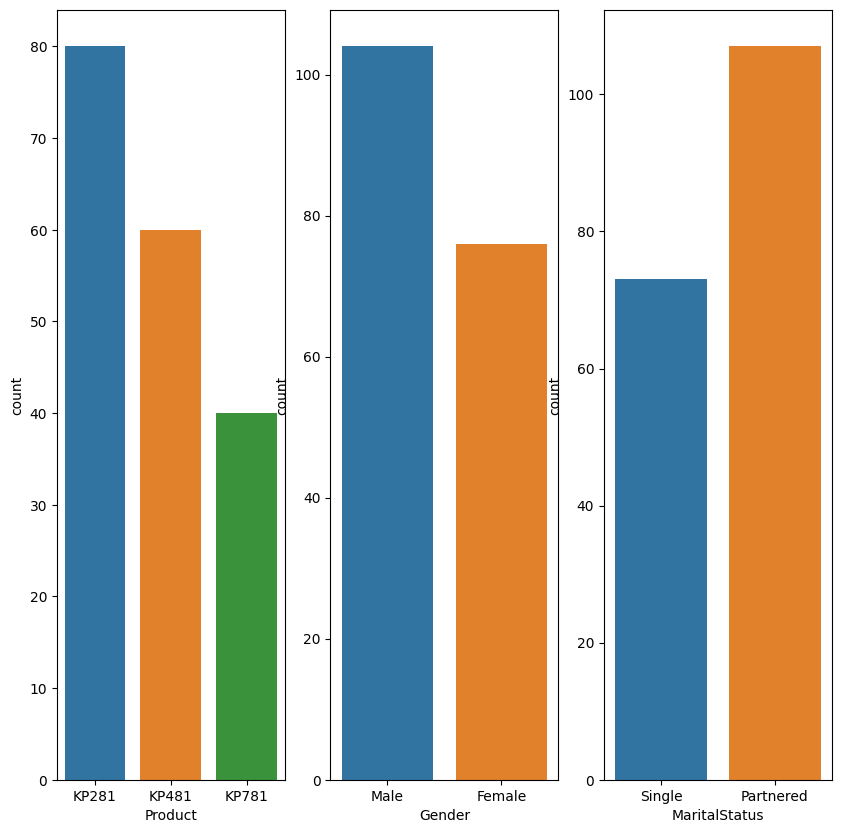

In [ ]:
fig, ax= pt.subplots(1,3, figsize=(10,10))
sns.countplot(data=df,x='Product',ax=ax[0])
sns.countplot(data=df,x='Gender',ax=ax[1])
sns.countplot(data=df,x= "MaritalStatus",ax=ax[2])
pt.show()

### 1.usage of Kp281 is more when compared to kp481 and kp281
### 2. Male use the threadmill more than female
### 3. partnered use it more than single.

In [ ]:
df1= df[["Product"]].melt()
df1.groupby(['variable','value'])[['value']].count()/len(df)*100

value
variable value           
Product  KP281  44.444444
         KP481  33.333333
         KP781  22.222222

### observation of percentages of users according to different types of products, were in we see that kp281 users are more.

In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


### positively correlated which means there positive growth.

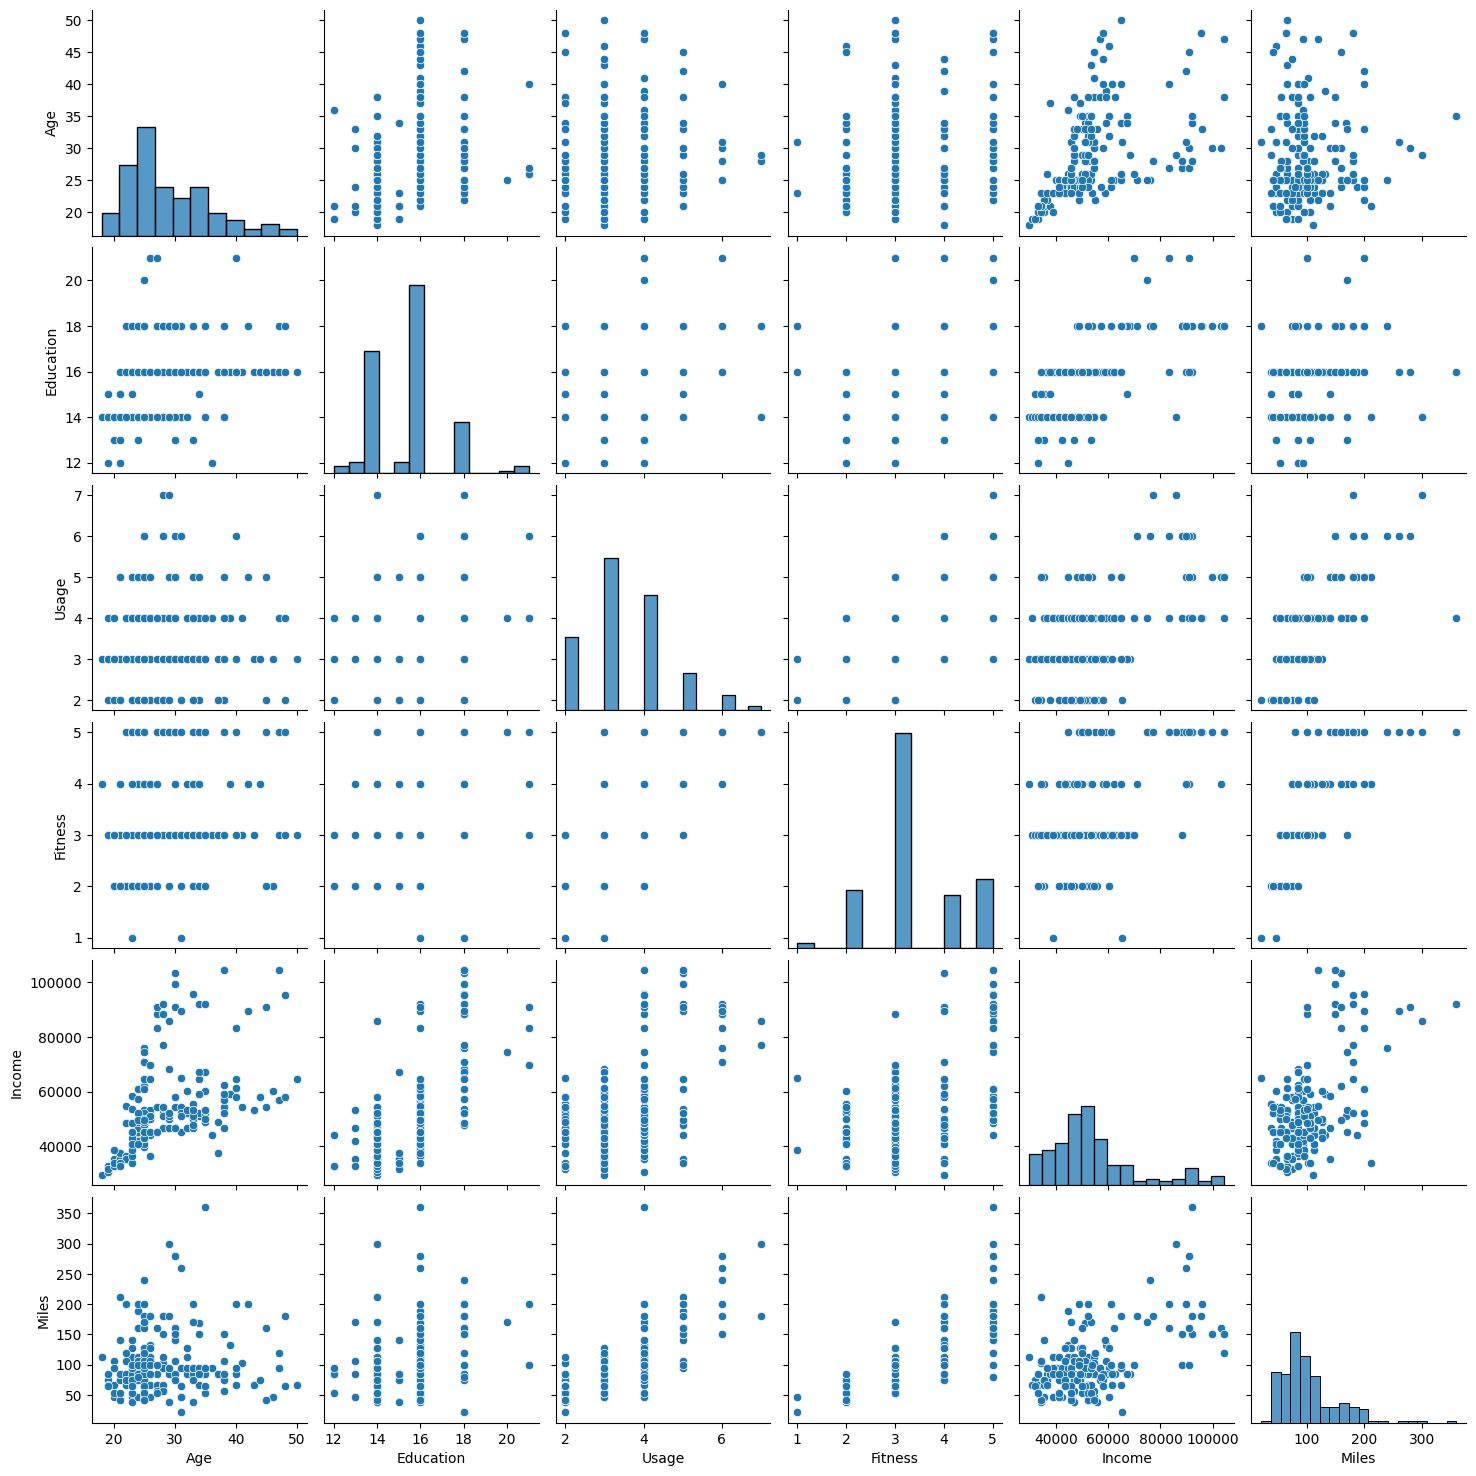

In [ ]:
sns.pairplot(data = df)

### **Observation of correlation in pairplot and heatmap**

<ipython-input-21-c5ad15d7e665>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="pink", annot=True)


<Axes: >

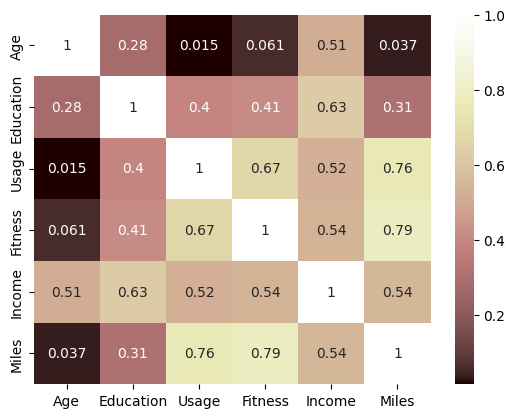

In [ ]:
sns.heatmap(df.corr(),cmap="pink", annot=True)

**Percentage of users of different types of products in male and females. **

In [ ]:
df2= df[["Product","Gender","MaritalStatus"]]
df2.groupby(['Product',"Gender"])[['Product']].count()/len(df)*100


Product
Product Gender           
KP281   Female  22.222222
        Male    22.222222
KP481   Female  16.111111
        Male    17.222222
KP781   Female   3.888889
        Male    18.333333

### **comparison of products with different categories.**

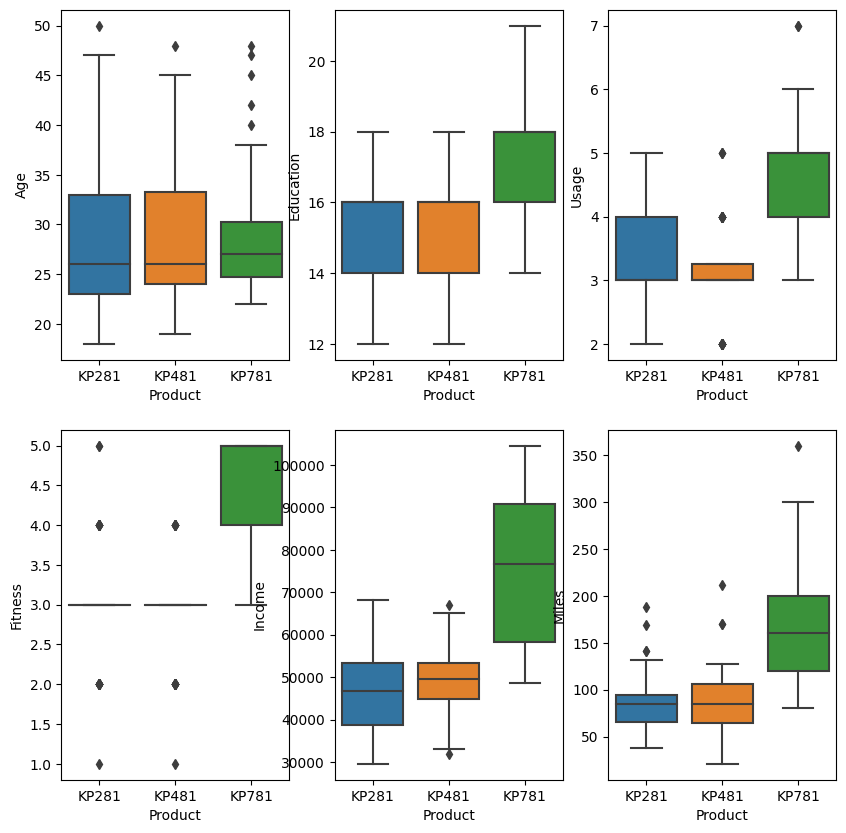

In [ ]:
fig, ax= pt.subplots(2,3, figsize=(10,10))
sns.boxplot(data=df,x='Product',ax=ax[0][0], y = "Age")
sns.boxplot(data=df,x='Product',ax=ax[0][1], y = "Education")
sns.boxplot(data=df,x='Product',ax=ax[0][2], y = "Usage")
sns.boxplot(data=df,x='Product',ax=ax[1][0], y = "Fitness")
sns.boxplot(data=df,x='Product',ax=ax[1][1], y = "Income")
sns.boxplot(data=df,x='Product',ax=ax[1][2], y = "Miles")
pt.show()

In [ ]:
df_male_281 = df.loc[(df["Product"]=='KP281')&(df["Gender"]== "Male")]
df_male_481 = df.loc[(df["Product"]=='KP481')&(df["Gender"]== "Male")]
df_male_781 = df.loc[(df["Product"]=='KP781')&(df["Gender"]== "Male")]
df_female_281 = df.loc[(df["Product"]=='KP281')&(df["Gender"]== "Female")]
df_female_481 = df.loc[(df["Product"]=='KP481')&(df["Gender"]== "Female")]
df_female_781 = df.loc[(df["Product"]=='KP781')&(df["Gender"]== "Female")]

In [ ]:
prob_male_kp281 = df_male_281["Product"].size / df.loc[(df["Gender"]== "Male")]["Product"].size
prob_male_kp481 = df_male_481["Product"].size / df.loc[(df["Gender"]== "Male")]["Product"].size
prob_male_kp781 = df_male_781["Product"].size / df.loc[(df["Gender"]== "Male")]["Product"].size
prob_female_kp281 = df_female_281["Product"].size / df.loc[(df["Gender"]== "Female")]["Product"].size
prob_female_kp481 = df_female_481["Product"].size / df.loc[(df["Gender"]== "Female")]["Product"].size
prob_female_kp781 = df_female_781["Product"].size / df.loc[(df["Gender"]== "Female")]["Product"].size

In [ ]:
np.round((prob_male_kp281,prob_male_kp481,prob_male_kp781),2)

array([0.38, 0.3 , 0.32])

1. Probability of male using kp281 : 0.38
2. Probability of male using kp481 : 0.3
3. Probability of male using kp781 : 0.32

In [ ]:
np.round((prob_female_kp281,prob_female_kp481,prob_female_kp781),2)

array([0.53, 0.38, 0.09])

1. Probability of female using kp281 : 0.53
2. Probability of female using kp481 : 0.38
3. Probability of female using kp781 : 0.09

In [ ]:
df_single_281 = df.loc[(df["Product"]=='KP281')&(df["MaritalStatus"]== "Single")]
df_single_481 = df.loc[(df["Product"]=='KP481')&(df["MaritalStatus"]== "Single")]
df_single_781 = df.loc[(df["Product"]=='KP781')&(df["MaritalStatus"]== "Single")]
df_Partnered_281 = df.loc[(df["Product"]=='KP281')&(df["MaritalStatus"]== "Partnered")]
df_Partnered_481 = df.loc[(df["Product"]=='KP481')&(df["MaritalStatus"]== "Partnered")]
df_Partnered_781 = df.loc[(df["Product"]=='KP781')&(df["MaritalStatus"]== "Partnered")]

In [ ]:
prob_single_kp281 = df_single_281["Product"].size / df.loc[(df["MaritalStatus"]== "Single")]["Product"].size
prob_single_kp481 = df_single_481["Product"].size / df.loc[(df["MaritalStatus"]== "Single")]["Product"].size
prob_single_kp781 = df_single_781["Product"].size / df.loc[(df["MaritalStatus"]== "Single")]["Product"].size
prob_Partnered_kp281 = df_Partnered_281["Product"].size / df.loc[(df["MaritalStatus"]== "Partnered")]["Product"].size
prob_Partnered_kp481 = df_Partnered_481["Product"].size / df.loc[(df["MaritalStatus"]== "Partnered")]["Product"].size
prob_Partnered_kp781 = df_Partnered_781["Product"].size / df.loc[(df["MaritalStatus"]== "Partnered")]["Product"].size

In [ ]:
np.round((prob_single_kp281,prob_single_kp481,prob_single_kp781),2)

array([0.44, 0.33, 0.23])

1. Probability of singles using kp281 : 0.44
2. Probability of singles using kp481 : 0.33
3. Probability of singles using kp781 : 0.23

In [ ]:
np.round((prob_Partnered_kp281,prob_Partnered_kp481,prob_Partnered_kp781),2)

array([0.45, 0.34, 0.21])

1. Probability of Partnered using kp281 : 0.45
2. Probability of Partnered using kp481 : 0.34
3. Probability of Partnered using kp781 : 0.21

**Insights:**
1. Customers who is partnered, is more likely to purchase the product and it is true for all the products.
2. Customers whose age lies between 25-30 are more likely to buy kp781.
3. Customers whose education is greater than 16, are more likely to buy kp781.
4. if a customer is more fit, he tends to buy kp781
5. if a customer is having high income then he tends to buy kp781.

**Recommendations:**
1. since our major customers are married one, we should try reaching out with couple gifting strategy.
2. we should reach the customers who are between 23-35 too.
3. we should reach audience who are less educated too.
4. we should design product in medium budget so as to try reaching less income people too.
5. Desgin of the product should be made to reach people who are moderately fit too.